<a href="https://colab.research.google.com/github/comet-ctrl/SP500_prediction/blob/main/MSFT_Prediction_Example_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('MSFT.csv')

In [3]:
df

,Date,Close,High,Low,Open,Volume
0,1986-03-26,0.057906,0.058437,0.055781,0.056313,22752000
1,1986-03-27,0.058969,0.058969,0.057906,0.057906,16848000
2,1986-03-31,0.058437,0.058969,0.057375,0.058969,12873600
3,1986-04-01,0.057906,0.058437,0.057906,0.058437,11088000
4,1986-04-02,0.058437,0.059500,0.057906,0.057906,27014400
...,...,...,...,...,...,...
9974,2025-10-27,531.520020,534.580017,529.010010,531.780029,18734700
9975,2025-10-28,542.070007,553.719971,540.770020,550.000000,29986700
9976,2025-10-29,541.549988,546.270020,536.729980,544.940002,36023000
9977,2025-10-30,525.760010,534.969971,522.119995,530.479980,41023100


In [5]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-26,0.057906
1,1986-03-27,0.058969
2,1986-03-31,0.058437
3,1986-04-01,0.057906
4,1986-04-02,0.058437
...,...,...
9974,2025-10-27,531.520020
9975,2025-10-28,542.070007
9976,2025-10-29,541.549988
9977,2025-10-30,525.760010


In [6]:
df['Date']

,Date
0,1986-03-26
1,1986-03-27
2,1986-03-31
3,1986-04-01
4,1986-04-02
...,...
9974,2025-10-27
9975,2025-10-28
9976,2025-10-29
9977,2025-10-30


In [8]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year, month = month, day = day)

datetime_object  = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [9]:
df['Date'] = df['Date'].apply(str_to_datetime)
df

/tmp/ipython-input-1287539604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date,Close
0,1986-03-26,0.057906
1,1986-03-27,0.058969
2,1986-03-31,0.058437
3,1986-04-01,0.057906
4,1986-04-02,0.058437
...,...,...
9974,2025-10-27,531.520020
9975,2025-10-28,542.070007
9976,2025-10-29,541.549988
9977,2025-10-30,525.760010


In [11]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-26,0.057906
1986-03-27,0.058969
1986-03-31,0.058437
1986-04-01,0.057906
1986-04-02,0.058437
...,...
2025-10-27,531.520020
2025-10-28,542.070007
2025-10-29,541.549988


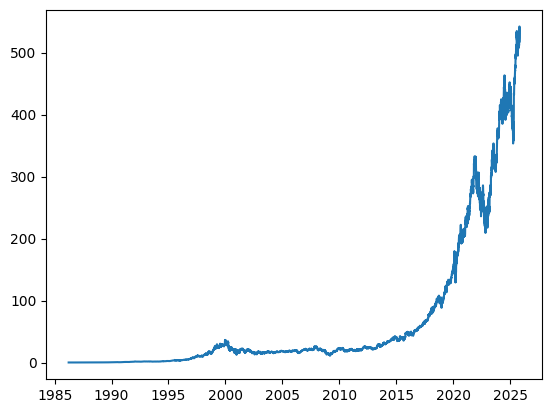

In [14]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [17]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n = 3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '1986-04-02',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1986-04-02,0.058969,0.058437,0.057906,0.058437
1,1986-04-03,0.058437,0.057906,0.058437,0.058969
2,1986-04-04,0.057906,0.058437,0.058969,0.058969
3,1986-04-07,0.058437,0.058969,0.058969,0.057906
4,1986-04-08,0.058969,0.058969,0.057906,0.058437
...,...,...,...,...,...
9064,2022-03-17,268.533325,278.937073,285.969940,286.776184
9065,2022-03-18,278.937073,285.969940,286.776184,291.837219
9066,2022-03-21,285.969940,286.776184,291.837219,290.603485
9067,2022-03-22,286.776184,291.837219,290.603485,295.363403


In [18]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates)), middle_matrix.shape[1], 1)
    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


((9069,), (9069, 3, 1), (9069,))

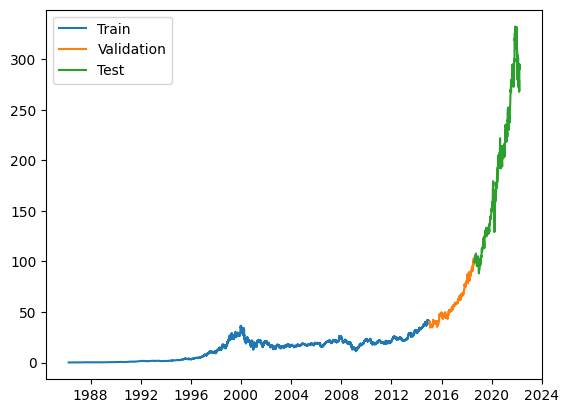

In [19]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1))])
model.add(layers.LSTM(64))
model.add(layers.Dense(32, 'relu'))
model.add(layers.Dense(32, 'relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,065 (78.38 KB)

 Trainable params: 20,065 (78.38 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.001), metrics = ['mean_absolute_error'])
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100)

Epoch 1/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 129.9588 - mean_absolute_error: 7.0865 - val_loss: 796.2341 - val_mean_absolute_error: 21.2929
Epoch 2/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2198 - mean_absolute_error: 0.2775 - val_loss: 627.3441 - val_mean_absolute_error: 17.7313
Epoch 3/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1429 - mean_absolute_error: 0.2211 - val_loss: 588.1489 - val_mean_absolute_error: 16.9012
Epoch 4/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1333 - mean_absolute_error: 0.2161 - val_loss: 566.8134 - val_mean_absolute_error: 16.4089
Epoch 5/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1382 - mean_absolute_error: 0.2201 - val_loss: 560.7982 - val_mean_absolute_error: 16.2704
Epoch 6/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1302 - mean_absolute_error: 0.2128 - val_loss: 553.9672 - val_mean_absolute_error: 16.2238
Epoch 7/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1476 - mean

227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


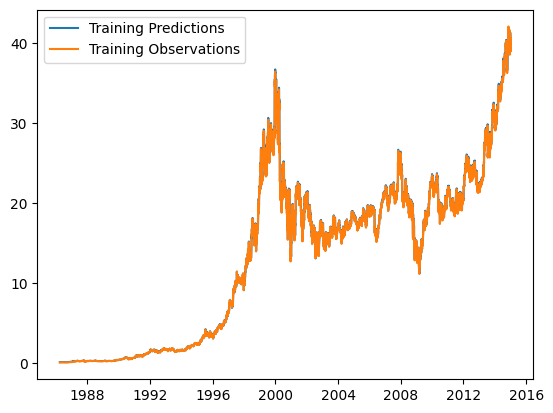

In [22]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


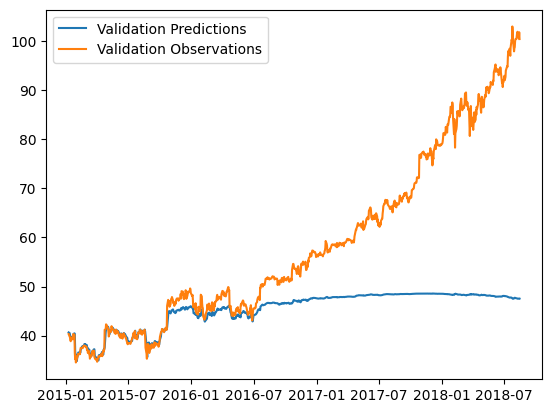

In [23]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


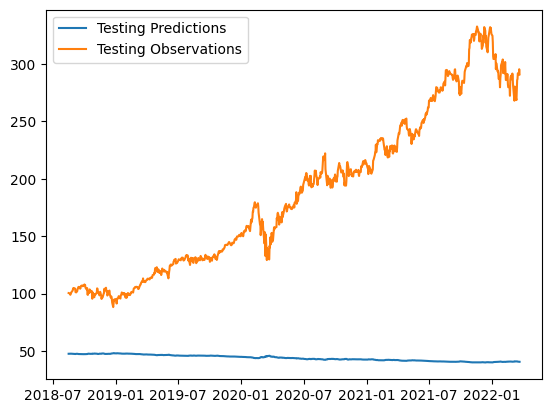

In [24]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

# This model is F**kingtastic so let's start predictiing with a closer time to weed out the useless early year information

In [25]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2023-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,227.388138,228.920135,226.877441,223.871140
1,2021-03-26,228.920135,226.877441,223.871140,227.860291
2,2021-03-29,226.877441,223.871140,227.860291,226.665466
3,2021-03-30,223.871140,227.860291,226.665466,223.399048
4,2021-03-31,227.860291,226.665466,223.399048,227.176117
...,...,...,...,...,...
498,2023-03-17,255.816223,260.377563,270.932343,274.100739
499,2023-03-20,260.377563,270.932343,274.100739,267.038116
500,2023-03-21,270.932343,274.100739,267.038116,268.558441
501,2023-03-22,274.100739,267.038116,268.558441,267.096924


In [27]:
dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((503,), (503, 3, 1), (503,))

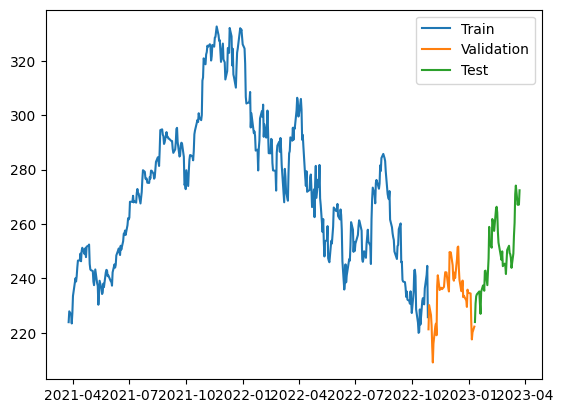

In [28]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 74975.0859 - mean_absolute_error: 272.3478 - val_loss: 54252.6602 - val_mean_absolute_error: 232.7034
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 73512.3984 - mean_absolute_error: 269.7925 - val_loss: 53400.1367 - val_mean_absolute_error: 230.8643
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 71987.0156 - mean_absolute_error: 266.9578 - val_loss: 52001.0352 - val_mean_absolute_error: 227.8140
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 71914.0312 - mean_absolute_error: 266.7559 - val_loss: 49884.6094 - val_mean_absolute_error: 223.1200
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 68509.1406 - mean_absolute_error: 260.3404 - val_loss: 46168.1211 - val_mean_absolute_error: 214.6288
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 63225.9570 - mean_absolute_error: 249.7586 - val_loss: 40427.3633 - val_mean_absolute_error: 200.8117
Epoch 7/100
13/13 ━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


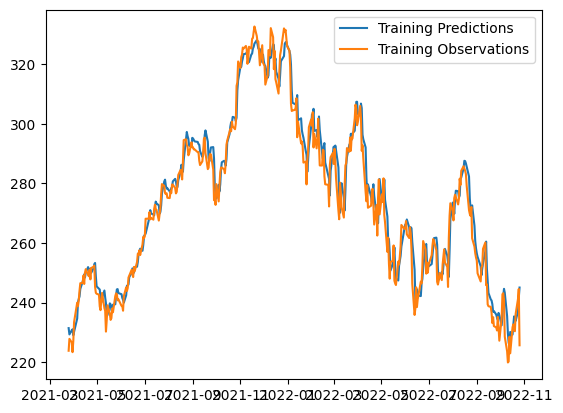

In [36]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


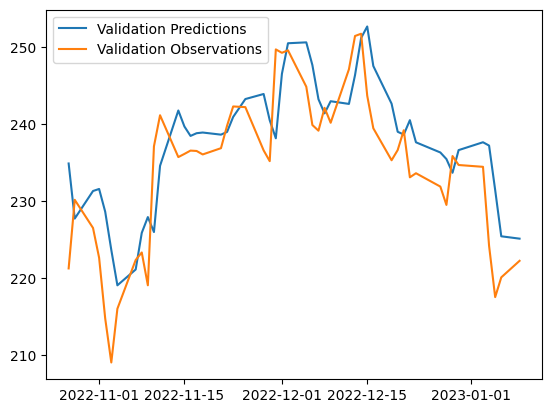

In [37]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


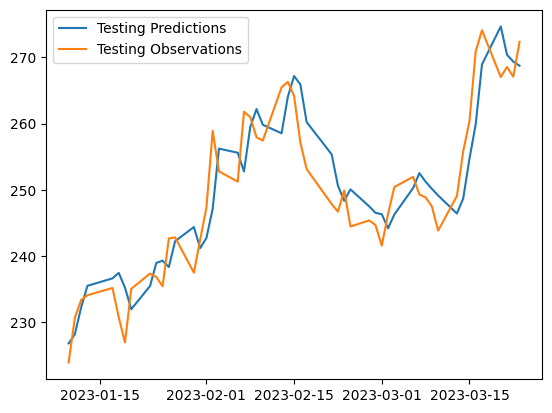

In [43]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [45]:
from copy import deepcopy
import numpy as np

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

# last window: shape (3, 1)
last_window = deepcopy(X_train[-1])

timesteps = last_window.shape[0]   # 3
n_features = last_window.shape[1]  # 1

for target_date in recursive_dates:
    # reshape to (1, 3, 1) for LSTM
    x_input = last_window.reshape(1, timesteps, n_features)
    # or: x_input = last_window[np.newaxis, :, :]

    # predict next value (scalar)
    next_pred = model.predict(x_input, verbose=0)[0, 0]

    recursive_predictions.append(next_pred)

    # keep last_window as shape (3, 1):
    # - drop first row
    # - append new prediction as new row [[next_pred]]
    last_window = np.vstack([last_window[1:], [[next_pred]]])
    # shape remains (3, 1)


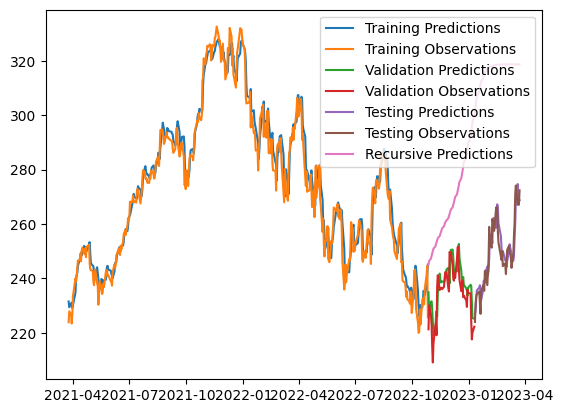

In [46]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])